![Image](https://cdn-images-1.medium.com/max/2400/1*LmxW8FDfXZJl5yvESvjP7Q.jpeg)

<left><h1>Handwritten Digits Classifier</h1></left>

In this project, we'll:
* explore why image classification is a hard task
* observe the limitations of traditional machine learning models for image classification
* train, test, and improve a few different deep neural networks for image classification

### Introduction

The `sklearn` library has built-in function that returns the exact copy of [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)
print(digits.data.shape)

(1797, 64)


In [2]:
digits.frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


The data set has **1797** images are represented as a row of pixel values. Since each row contain **64** values our images have **8x8** resolution.

Let's display some of them using `matplotlib`.

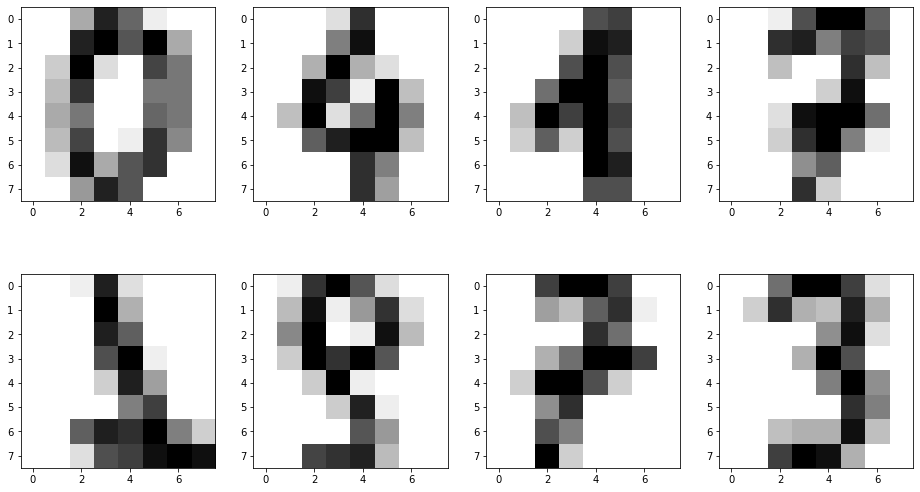

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

fix, axs = plt.subplots(2, 4, figsize=(16,9))
digits_df = digits.data
bias = 0

for row in range(2):
    for col in range(4):
        #Calculate index for each image
        #It would be 1100 for second bottom image for exaple 
        index = col * 100 + bias
        image = digits_df.iloc[index].values.reshape(8,8)
        axs[row, col].imshow(image, cmap='gray_r')
        
    bias = 1000

### KNN classifier

Due to there is no linearity between image's pixels and an actiual digit we'll use the k-nearest neighbors algorithm here. The `KNeighborsClassifier` to be precise.

Let's define a few functions and run them with **k=5** and **folds=4**.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train_test(train_set, test_set, k):
    #trains and tests k-nearest neighbors models with different k
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_set.iloc[:, :-1], train_set['target'])
    prediction = knn.predict(test_set.iloc[:, :-1])
    
    return prediction
    
def cross_validate(data, k):
    #performs 4-fold cross validation using train() and test()
    #returns overall accuracy
    
    kf = KFold(n_splits=4,
              shuffle=True,
              random_state=0)
    
    accuracies = []
    
    for train_index, test_index in kf.split(data):
        
        train_set = data.iloc[train_index]
        test_set = data.iloc[test_index]
        
        prediction = train_test(train_set, test_set, k)
        
        accuracy = accuracy_score(test_set['target'], prediction)
        accuracies.append(accuracy)
        
    return np.mean(accuracies)

cross_validate(digits.frame, 5)

0.9821937639198218

Now let's iterate number of neigbors and build a plot for computed accuracies.

In [18]:
k_accuracy = {}

k_nums = range(1,16)

for k in k_nums:
    accuracy = cross_validate(digits.frame, k)
    k_accuracy[k] = accuracy
    
k_accuracy

{1: 0.9866419203167534,
 2: 0.9816344964117792,
 3: 0.9844172234595397,
 4: 0.982750556792873,
 5: 0.9821937639198218,
 6: 0.981639445681762,
 7: 0.9821950012373174,
 8: 0.9833085869834199,
 9: 0.9833085869834199,
 10: 0.9805258599356594,
 11: 0.9777431328878989,
 12: 0.9794135115070528,
 13: 0.9766307844592923,
 14: 0.9771875773323435,
 15: 0.9766307844592923}

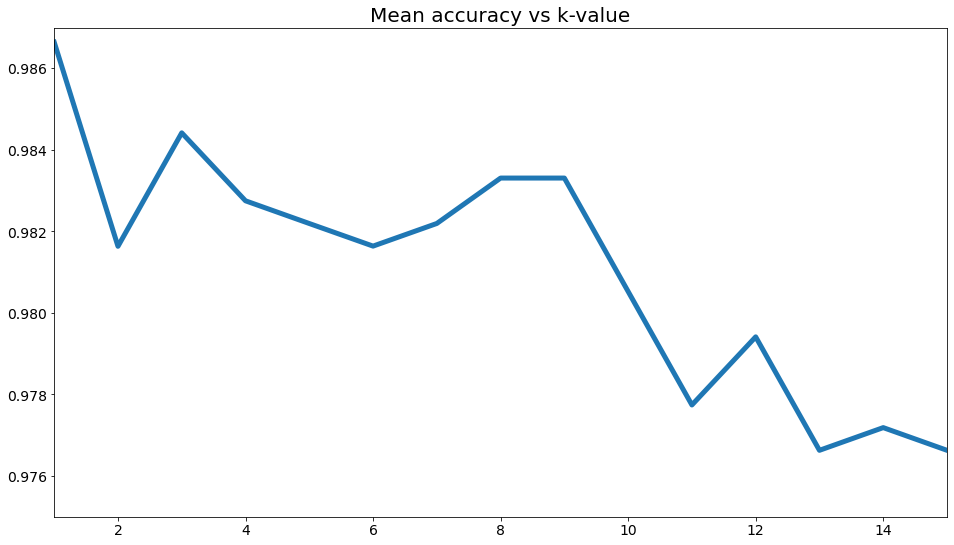

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(k_accuracy.keys(),
        k_accuracy.values(),
       lw=5)

#decorations
ax.set_xlim(1, 15)
ax.set_ylim(0.975, 0.987)
ax.set_title('Mean accuracy vs k-value', fontsize=20)
ax.tick_params(labelsize=14)

It seems the best result is **0.986** with **k=1**. Increasing k-value doesn't make our predictions more accurate.

### MLP classifier 